In [34]:
% cd C:\Users\wolfg\Documents\GitHub\sudoku_solver

from imutils.perspective import four_point_transform
from imutils import contours
import imutils
import cv2
import pytesseract
import numpy as np
import os
import tensorflow as tf
import keras
loaded_model = keras.models.load_model('pretrained_MNIST_model.h5')

C:\Users\wolfg\Documents\GitHub\sudoku_solver


In [35]:
image = cv2.imread("sudoku_2.png")

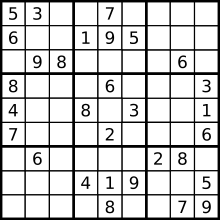

In [36]:
from IPython.display import Image
Image("sudoku_2.png")

In [37]:
img = imutils.resize(image, height=1000)
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY,cv2.THRESH_OTSU)
img_bin = 255 - img_bin

In [38]:
kernel_length = np.array(img).shape[1]//80
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

In [39]:
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

True

In [40]:
alpha = 0.5
beta = 1.0 - alpha
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)
cv2.imwrite("img_final_bin.jpg",img_final_bin)
img_final_bin = cv2.cvtColor(img_final_bin, cv2.COLOR_BGR2GRAY)
img_final_bin.dtype
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [41]:
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2.imshow('Contours', img) 
cv2.waitKey(0)

-1

In [42]:
idx_list_big = []

idx_big = 0
idx_square = 1

for c in contours:
        # Returns the location and width,height for every contour
        
    
    x, y, w, h = cv2.boundingRect(c)
    
    print(x,y,w,h)
    
    if (w > 80 and h > 80) and (w < 140 and h < 140):
        
        print("Large contour detected: is " + str(idx_big))
        
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite('square_' + str(10-idx_square) + '.png', new_img)
        
        idx_list_big.append(idx_big)
        
        idx_square += 1
        
        

    idx_big += 1

c = [contours[i] for i in idx_list_big]
print(len(c))

cv2.drawContours(img, c, -1, (0, 255, 0), 3)
cv2.imshow('Contours', img) 
cv2.waitKey(0)

888 889 101 99
Large contour detected: is 0
948 918 10 47
779 889 101 99
Large contour detected: is 2
809 911 43 10
675 889 95 99
Large contour detected: is 4
561 889 96 99
Large contour detected: is 5
453 889 96 99
Large contour detected: is 6
343 889 96 99
Large contour detected: is 7
229 889 96 99
Large contour detected: is 8
120 889 100 99
Large contour detected: is 9
11 889 96 99
Large contour detected: is 10
675 783 95 97
Large contour detected: is 11
561 783 96 97
Large contour detected: is 12
615 805 11 55
448 783 101 97
Large contour detected: is 14
493 804 15 61
343 783 96 97
Large contour detected: is 16
368 804 47 61
229 783 96 97
Large contour detected: is 18
120 783 100 97
Large contour detected: is 19
11 783 96 97
Large contour detected: is 20
888 780 101 100
Large contour detected: is 21
779 780 101 100
Large contour detected: is 22
888 675 101 96
Large contour detected: is 23
779 675 101 96
Large contour detected: is 24
675 675 95 96
Large contour detected: is 25
701 7

-1

In [43]:
all_squares = []

for square in os.listdir():
    if square.endswith(".png") and square.startswith('square'):
        
        file_name = os.path.join(square)
        
        all_squares.append(file_name)
        
all_squares

['square_-1.png',
 'square_-10.png',
 'square_-11.png',
 'square_-12.png',
 'square_-13.png',
 'square_-14.png',
 'square_-15.png',
 'square_-16.png',
 'square_-17.png',
 'square_-18.png',
 'square_-19.png',
 'square_-2.png',
 'square_-20.png',
 'square_-21.png',
 'square_-22.png',
 'square_-23.png',
 'square_-24.png',
 'square_-25.png',
 'square_-26.png',
 'square_-27.png',
 'square_-28.png',
 'square_-29.png',
 'square_-3.png',
 'square_-30.png',
 'square_-31.png',
 'square_-32.png',
 'square_-33.png',
 'square_-34.png',
 'square_-35.png',
 'square_-36.png',
 'square_-37.png',
 'square_-38.png',
 'square_-39.png',
 'square_-4.png',
 'square_-40.png',
 'square_-41.png',
 'square_-42.png',
 'square_-43.png',
 'square_-44.png',
 'square_-45.png',
 'square_-46.png',
 'square_-47.png',
 'square_-48.png',
 'square_-49.png',
 'square_-5.png',
 'square_-50.png',
 'square_-51.png',
 'square_-52.png',
 'square_-53.png',
 'square_-54.png',
 'square_-55.png',
 'square_-56.png',
 'square_-57.png'

In [31]:
for square in all_squares:
    
    print(square)
    
    single_chars = [char for char in square] 
    
    square_no = [int(s) for s in single_chars if s.isdigit()][0]
    
    newpath = 'C:\\Users\\wolfg\\Documents\\GitHub\\sudoku_solver\\' + str(square_no)
    
    print(newpath)

square_-1.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-10.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-11.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-12.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-13.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-14.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-15.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-16.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-17.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-18.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-19.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\1
square_-2.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\2
square_-20.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\2
square_-21.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\2
square_-22.png
C:\Users\wolfg\Documents\GitHub\sudoku_solver\2
square_-23.png
C:\Users\wolfg\Documents\GitHub\sudoku_sol

In [67]:
non_empty_list = []

idx = 0

for img in all_squares:
    
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(contours) != 1:
        
        non_empty_list.append(idx)
        
    idx += 1

In [68]:
non_empty_images = [all_squares[i] for i in non_empty_list]

In [71]:
predictions = []
    
for idex, img in enumerate(non_empty_images):
    
        # file = 'C:/Users/wolfg/Documents/GitHub/sudoku_solver/' + img
        
    image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (28, 28))
    image = image.astype('float32')
    image = image.reshape(1, 28, 28, 1)
    image = 255-image
    image /= 255
    pred = loaded_model.predict(image.reshape(1, 28, 28, 1), batch_size=1)
        # print(img + " is a predicted: " + str(pred.argmax()))
        
    predictions.append(pred.argmax())
    
    print(img, pred.argmax())

square_-1.png 9
square_-10.png 8
square_-11.png 2
square_-16.png 5
square_-18.png 5
square_-2.png 1
square_-22.png 2
square_-26.png 7
square_-27.png 1
square_-3.png 4
square_-30.png 3
square_-32.png 8
square_-35.png 4
square_-36.png 3
square_-40.png 5
square_-44.png 8
square_-46.png 5
square_-51.png 8
square_-52.png 9
square_-56.png 5
square_-57.png 9
square_-59.png 1
square_-62.png 5
square_-67.png 1
square_-7.png 5
square_-70.png 3
square_-71.png 5
square_5.png 8
square_8.png 7
square_9.png 9


In [32]:
squares_container = []

parent_path = 'C:\\Users\\wolfg\\Documents\\GitHub\\sudoku_solver'

for square in all_squares:
    
    single_chars = [char for char in square] 
    
    square_no = [int(s) for s in single_chars if s.isdigit()][0]

    target_path = 'C:\\Users\\wolfg\\Documents\\GitHub\\sudoku_solver\\square_' + str(square_no)
    
    if not os.path.exists(target_path):
        
        os.makedirs(target_path)
    
    img_number = square_no

    im = cv2.imread(square)
    im = cv2.resize(im,(600,600))

    image_prefix = str(img_number) + "-"

    imgheight=im.shape[0]
    imgwidth=im.shape[1]

    y1 = 0
    M = int(imgheight*1/3)
    N = int(imgwidth*1/3)

    os.chdir(target_path)
    
    for y in range(0,imgheight,M):
        
        for x in range(0, imgwidth, N):
            y1 = y + M
            x1 = x + N
            tiles = im[y:y+M,x:x+N]

            cv2.rectangle(im, (x, y), (x1, y1), (0, 255, 0))
            cv2.imwrite(image_prefix + str(x) + '_' + str(y)+".png",tiles)

    all_png = []

    for file in os.listdir():
        if file.endswith(".png") and file.startswith(image_prefix):
        
            file_name = os.path.join(file)
        
            all_png.append(file_name)
        
    idx = 0

    non_empty_list = []

    for img in all_png:
    
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
        if len(contours) != 1:
        
            non_empty_list.append(idx)
        
        idx += 1
    
    # print(img, len(contours))
    
    non_empty_images = [all_png[i] for i in non_empty_list]

    empty_images = [i for i in all_png if i not in non_empty_images]

    for empty_image in empty_images:
    
         os.remove(empty_image)
        
    non_empty_indices = [i for i, e in enumerate(all_png) if e in non_empty_images]
    
    empty_indices = [i for i, e in enumerate(all_png) if e in empty_images]
    
#     orig = np.zeros(9)
    
#     for non_empty in non_empty_indices:
    
#         orig[non_empty] = 1
        
#     for empty in empty_indices:
        
#         orig[empty] = np.NaN
        
    # orig = orig.reshape(3,3).T
    
    index_list = []

    ax = 0

    for i in range(9):
    
        if i in non_empty_indices:
        
            mark = ax
        
            ax += 1
        
        else:
        
            mark = np.NaN
        
        index_list.append(mark)
        
    predictions = []
    
    for idex, img in enumerate(non_empty_images):
    
        # file = 'C:/Users/wolfg/Documents/GitHub/sudoku_solver/' + img
        
        image = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        image = image.astype('float32')
        image = image.reshape(1, 28, 28, 1)
        image = 255-image
        image /= 255
        pred = loaded_model.predict(image.reshape(1, 28, 28, 1), batch_size=1)
        # print(img + " is a predicted: " + str(pred.argmax()))
        
        predictions.append(pred.argmax())
        
    final_mat = np.zeros(9)

    true_counter = 0

    for idex, i in enumerate(index_list):
    
        if type(i) == int:
    
            final_mat[idex] = predictions[true_counter]
        
            true_counter += 1
        
        elif type(i) == float:
        
            final_mat[idex] = np.NaN
            
    final_mat = final_mat.reshape(3,3)
    
    squares_container.append(final_mat)              
                    
    os.chdir(parent_path)
    
ultra_matrix = np.zeros((9, 3, 3))

for idx,i in enumerate(squares_container):
    
    ultra_matrix[idx] = i 

IndexError: index 9 is out of bounds for axis 0 with size 9

In [755]:
column_1 = np.zeros(9)
column_2 = np.zeros(9)
column_3 = np.zeros(9)
column_4 = np.zeros(9)
column_5 = np.zeros(9)
column_6 = np.zeros(9)
column_7 = np.zeros(9)
column_8 = np.zeros(9)
column_9 = np.zeros(9)

column_1[0] = ultra_matrix.transpose(0,1,2)[0][0][0]
column_1[1] = ultra_matrix.transpose(0,1,2)[0][0][1]
column_1[2] = ultra_matrix.transpose(0,1,2)[0][0][2]
column_1[3] = ultra_matrix.transpose(0,1,2)[3][0][0]
column_1[4] = ultra_matrix.transpose(0,1,2)[3][0][1]
column_1[5] = ultra_matrix.transpose(0,1,2)[3][0][2]
column_1[6] = ultra_matrix.transpose(0,1,2)[6][0][0]
column_1[7] = ultra_matrix.transpose(0,1,2)[6][0][1]
column_1[8] = ultra_matrix.transpose(0,1,2)[6][0][2]

column_2[0] = ultra_matrix.transpose(0,1,2)[0][1][0]
column_2[1] = ultra_matrix.transpose(0,1,2)[0][1][1]
column_2[2] = ultra_matrix.transpose(0,1,2)[0][1][2]
column_2[3] = ultra_matrix.transpose(0,1,2)[3][1][0]
column_2[4] = ultra_matrix.transpose(0,1,2)[3][1][1]
column_2[5] = ultra_matrix.transpose(0,1,2)[3][1][2]
column_2[6] = ultra_matrix.transpose(0,1,2)[6][1][0]
column_2[7] = ultra_matrix.transpose(0,1,2)[6][1][1]
column_2[8] = ultra_matrix.transpose(0,1,2)[6][1][2]

column_3[0] = ultra_matrix.transpose(0,1,2)[0][2][0]
column_3[1] = ultra_matrix.transpose(0,1,2)[0][2][1]
column_3[2] = ultra_matrix.transpose(0,1,2)[0][2][2]
column_3[3] = ultra_matrix.transpose(0,1,2)[3][2][0]
column_3[4] = ultra_matrix.transpose(0,1,2)[3][2][1]
column_3[5] = ultra_matrix.transpose(0,1,2)[3][2][2]
column_3[6] = ultra_matrix.transpose(0,1,2)[6][2][0]
column_3[7] = ultra_matrix.transpose(0,1,2)[6][2][1]
column_3[8] = ultra_matrix.transpose(0,1,2)[6][2][2]

column_4[0] = ultra_matrix.transpose(0,1,2)[1][0][0]
column_4[1] = ultra_matrix.transpose(0,1,2)[1][0][1]
column_4[2] = ultra_matrix.transpose(0,1,2)[1][0][2]
column_4[3] = ultra_matrix.transpose(0,1,2)[4][0][0]
column_4[4] = ultra_matrix.transpose(0,1,2)[4][0][1]
column_4[5] = ultra_matrix.transpose(0,1,2)[4][0][2]
column_4[6] = ultra_matrix.transpose(0,1,2)[7][0][0]
column_4[7] = ultra_matrix.transpose(0,1,2)[7][0][1]
column_4[8] = ultra_matrix.transpose(0,1,2)[7][0][2]

column_5[0] = ultra_matrix.transpose(0,1,2)[1][1][0]
column_5[1] = ultra_matrix.transpose(0,1,2)[1][1][1]
column_5[2] = ultra_matrix.transpose(0,1,2)[1][1][2]
column_5[3] = ultra_matrix.transpose(0,1,2)[4][1][0]
column_5[4] = ultra_matrix.transpose(0,1,2)[4][1][1]
column_5[5] = ultra_matrix.transpose(0,1,2)[4][1][2]
column_5[6] = ultra_matrix.transpose(0,1,2)[7][1][0]
column_5[7] = ultra_matrix.transpose(0,1,2)[7][1][1]
column_5[8] = ultra_matrix.transpose(0,1,2)[7][1][2]

column_6[0] = ultra_matrix.transpose(0,1,2)[1][2][0]
column_6[1] = ultra_matrix.transpose(0,1,2)[1][2][1]
column_6[2] = ultra_matrix.transpose(0,1,2)[1][2][2]
column_6[3] = ultra_matrix.transpose(0,1,2)[4][2][0]
column_6[4] = ultra_matrix.transpose(0,1,2)[4][2][1]
column_6[5] = ultra_matrix.transpose(0,1,2)[4][2][2]
column_6[6] = ultra_matrix.transpose(0,1,2)[7][2][0]
column_6[7] = ultra_matrix.transpose(0,1,2)[7][2][1]
column_6[8] = ultra_matrix.transpose(0,1,2)[7][2][2]

column_7[0] = ultra_matrix.transpose(0,1,2)[2][0][0]
column_7[1] = ultra_matrix.transpose(0,1,2)[2][0][1]
column_7[2] = ultra_matrix.transpose(0,1,2)[2][0][2]
column_7[3] = ultra_matrix.transpose(0,1,2)[5][0][0]
column_7[4] = ultra_matrix.transpose(0,1,2)[5][0][1]
column_7[5] = ultra_matrix.transpose(0,1,2)[5][0][2]
column_7[6] = ultra_matrix.transpose(0,1,2)[8][0][0]
column_7[7] = ultra_matrix.transpose(0,1,2)[8][0][1]
column_7[8] = ultra_matrix.transpose(0,1,2)[8][0][2]

column_8[0] = ultra_matrix.transpose(0,1,2)[2][1][0]
column_8[1] = ultra_matrix.transpose(0,1,2)[2][1][1]
column_8[2] = ultra_matrix.transpose(0,1,2)[2][1][2]
column_8[3] = ultra_matrix.transpose(0,1,2)[5][1][0]
column_8[4] = ultra_matrix.transpose(0,1,2)[5][1][1]
column_8[5] = ultra_matrix.transpose(0,1,2)[5][1][2]
column_8[6] = ultra_matrix.transpose(0,1,2)[8][1][0]
column_8[7] = ultra_matrix.transpose(0,1,2)[8][1][1]
column_8[8] = ultra_matrix.transpose(0,1,2)[8][1][2]

column_9[0] = ultra_matrix.transpose(0,1,2)[2][2][0]
column_9[1] = ultra_matrix.transpose(0,1,2)[2][2][1]
column_9[2] = ultra_matrix.transpose(0,1,2)[2][2][2]
column_9[3] = ultra_matrix.transpose(0,1,2)[5][2][0]
column_9[4] = ultra_matrix.transpose(0,1,2)[5][2][1]
column_9[5] = ultra_matrix.transpose(0,1,2)[5][2][2]
column_9[6] = ultra_matrix.transpose(0,1,2)[8][2][0]
column_9[7] = ultra_matrix.transpose(0,1,2)[8][2][1]
column_9[8] = ultra_matrix.transpose(0,1,2)[8][2][2]

In [756]:
stacked = np.stack((column_1, column_2, column_3, column_4, column_5, column_6, column_7, column_8, column_9), axis=-1)

In [757]:
df = pd.DataFrame(data=stacked)

In [758]:
df

,0,1,2,3,4,5,6,7,8
0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,9.0,5.0,NaN,NaN,NaN
2,NaN,NaN,8.0,NaN,NaN,NaN,NaN,5.0,NaN
3,8.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
4,4.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,1.0
5,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
6,NaN,6.0,NaN,NaN,NaN,NaN,2.0,8.0,NaN
7,NaN,NaN,NaN,4.0,1.0,9.0,NaN,NaN,5.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN


In [102]:
# from PIL import Image
# column = Image.open('1.png')
# gray = column.convert('L')
# blackwhite = gray.point(lambda x: 0 if x < 200 else 255, '1')
# blackwhite.save("1_bw.png")

1

In [ ]:
from torchvision import models
import torch
 
dir(models)

In [403]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\wolfg/.torch\models\alexnet-owt-4df8aa71.pth
100%|███████████████████████████████████████████████████████████████| 244418560/244418560 [03:00<00:00, 1356233.82it/s]


In [404]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [ ]:
# Import Pillow
from PIL import Image
img = Image.open("43.png")

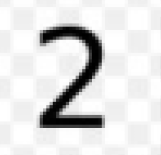

In [406]:
img

In [ ]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [408]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [409]:
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [401]:
# from PIL import Image
# column = Image.open('43.png')
# gray = column.convert('L')
# blackwhite = gray.point(lambda x: 0 if x < 200 else 255, '1')
# blackwhite.save("43_bw.png")

-1

In [359]:
height = []
width = []
idx_liste = []

idx = 0

for i in contours:
    
    x, y, w, h = cv2.boundingRect(i)
    
    # print(idx, x, y, w, h)
    
    idx += 1

0 1 1 501 498
1 244 470 5 5
2 247 463 5 5
3 251 450 4 8
4 254 440 5 5
5 257 437 5 5
6 258 427 4 5
7 264 414 4 5
8 274 395 4 4
9 247 388 9 5
10 238 388 8 5
11 260 385 12 5
12 254 385 5 5
13 437 303 5 5
14 460 287 4 5
15 460 267 4 5
16 453 257 5 5
17 453 251 5 5
18 447 251 4 4
19 434 248 8 4
20 411 247 8 8
21 411 231 8 5
22 411 221 8 9
23 430 212 5 4
24 420 212 9 4
25 87 127 5 4
26 74 126 9 5
27 91 124 5 4
28 81 124 5 4
29 61 124 5 7
30 271 117 4 5
31 225 107 4 5
32 277 101 5 5
33 231 87 5 5
34 254 78 8 4
35 244 78 5 4
36 91 77 4 6
37 231 71 5 5
38 97 68 5 8
39 100 58 5 5
40 238 39 4 4
41 87 39 5 4
42 257 35 5 5
43 244 35 5 5
44 65 35 5 5


45

In [328]:
gray = cv2.cvtColor(img_final_bin, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 200)

(thresh, img_bin) = cv2.threshold(edges, 128, 255,cv2.THRESH_BINARY,cv2.THRESH_OTSU)
img_bin = 255 - img_bin

contours, hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

height = []
width = []
idx_liste = []

idx = 0

for i in contours:
    
    x, y, w, h = cv2.boundingRect(i)
    
    if h > 100:
    
        idx_liste.append(idx)
    
        width.append(w)
        height.append(h)
    
    #print(idx,x,y,w,h)
    
    idx += 1

c = [contours[i] for i in idx_liste]

cv2.drawContours(sub_img, c[0], -1, (255, 255, 255), 3)
cv2.imshow('Contours', sub_img) 
cv2.waitKey(0)

-1

21

In [293]:
# cv2.imshow('Contours', edges) 
# cv2.waitKey(0)

-1

-1

In [306]:
cv2.imshow('Contours', sub_img) 
cv2.waitKey(0)

-1

407

In [272]:
cv2.boundingRect(contours[0])

(0, 0, 503, 500)

In [270]:
cv2.drawContours(sub_img, contours[0], -1, (0, 255, 0), 3)
cv2.imshow('Contours', sub_img) 
cv2.waitKey(0)

-1

In [268]:
idx_list = []

idx = 0
for c in contours:
        # Returns the location and width,height for every contour
        
    
    x, y, w, h = cv2.boundingRect(c)
    
    if (w > 130 and h > 150) and (w < 160 and h < 160):
        
        print("Large contour detected: is " + str(idx))
        
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite(str(idx) + '.png', new_img)
        
        idx_list.append(idx)

    idx += 1
    
# c = [contours[i] for i in idx_list]

Large contour detected: is 394
Large contour detected: is 398


-1

Large contour detected: is 394
Large contour detected: is 398


-1

In [ ]:
idx_list = []

idx = 0
for c in contours:
        # Returns the location and width,height for every contour
        
    
    x, y, w, h = cv2.boundingRect(c)
    
    # print(idx,x,y,w,h)
    
    if (w > 150 and h > 150) and (w < 160 and h < 160):
        
        print("Large contour detected: is " + str(idx))
        
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite(str(idx) + '.png', new_img)
        
        idx_list.append(idx)

    idx += 1

print(len(idx_list))

c = [ contours[i] for i in idx_list]

cv2.drawContours(img, c, -1, (0, 255, 0), 3)
cv2.imshow('Contours', img) 
cv2.waitKey(0)

True

In [227]:
cv2.imshow('Contours', img_bin) 
cv2.waitKey(0)

-1

-1

In [186]:
x, y, w, h = cv2.boundingRect(contours[0])
print(x,y,w,h)

3 3 497 494


In [187]:
?cv2.drawContours

In [139]:
for i in contours:
    
    print (len(i))

4
102
111
133
46
33
147


In [13]:
idx_list = []

idx = 0
for c in contours:
        # Returns the location and width,height for every contour
        
    
    x, y, w, h = cv2.boundingRect(c)
    
    print(idx,x,y,w,h)
    
    if (w > 150 and h > 150) and (w < 160 and h < 160):
        
        print("Large contour detected: is " + str(idx))
        
        new_img = img[y:y+h, x:x+w]
        cv2.imwrite(str(idx) + '.png', new_img)
        
        idx_list.append(idx)

    idx += 1

print(len(idx_list))

c = [ contours[i] for i in idx_list]

cv2.drawContours(img, c, -1, (0, 255, 0), 3)
cv2.imshow('Contours', img) 
cv2.waitKey(0) 

0 4 4 293 292
1 127 219 41 62
2 231 120 43 64
3 125 19 45 64
4 138 56 19 17
5 139 30 17 15
6 27 19 41 64
0


-1

In [75]:
img_bin = 255 - img_bin

sub_contours, sub_hierarchy = cv2.findContours(img_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)  

# Defining a kernel length
kernel_length = np.array(img).shape[1]//80
 

# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
# cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
# cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)
cv2.imwrite("img_final_bin.jpg",img_final_bin)

# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY, cv2.THRESH_OTSU)
cv2.imwrite("img_final_bin.jpg",img_final_bin)

# cv2.imshow('Contours', edges) 
# cv2.waitKey(0) 

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'
